In [1]:
from glob import glob
from pathlib import Path
from PIL import Image
import numpy as np
from seasalt.salt_net import (
    SaltNetOneStageHandler,
    noise_adder_numpy,
    NoiseType,
    plot_before_after_and_original,
)
from math import floor

path_to_images = Path().resolve().joinpath("BSDS300-test")
image_paths = glob(f"{str(path_to_images)}/*.jpg")

im = Image.open(sorted(image_paths)[69])

In [12]:
im_gs = im.convert("L")
arr = np.array(im_gs)
noise_parameter = 50/255
arr_sap = noise_adder_numpy(arr, noise_parameter, NoiseType.SAP)
arr_bernoulli = noise_adder_numpy(arr, noise_parameter, NoiseType.BERNOULLI)
arr_poisson = noise_adder_numpy(arr, noise_parameter, NoiseType.POISSON)
arr_gaussian = noise_adder_numpy(arr, noise_parameter, NoiseType.GUASSIAN)

In [3]:
# model = SaltNetOneStageHandler(denoiser_path="./models/pytorch_mamba3_20.h5")
# model = SaltNetOneStageHandler(
    # denoiser_path="./models/pytorch_low_gaussian_no_clip_psnr_128_6.h5"
# )
model = SaltNetOneStageHandler(denoiser_path="./models/pytorch_dfwb_data_128_6.h5")
# model = SaltNetOneStageHandler(
# denoiser_path="./models/pytorch_with_transformers_before_unet_81.h5"
# )
# model = SaltNetOneStageHandler(
# denoiser_path="./models/pytorch_with_transformers_before_unet_l1_128_secondp_8.h5"
# )

In [4]:
# import torch
# model.denoiser(torch.ones(1,1,256,256).cuda().float())

In [5]:
# from torchinfo import summary


# model.denoiser.to("cpu")
# summary(model.denoiser, (1, 1, 256, 256))

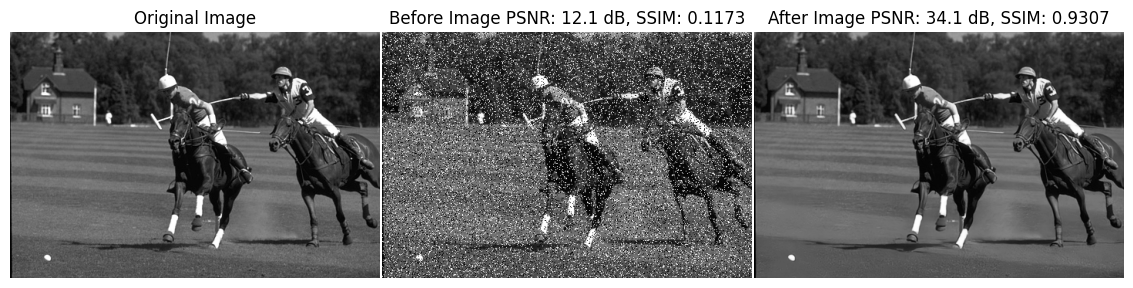

In [6]:
plot_before_after_and_original(arr, arr_sap, model.predict(arr_sap))

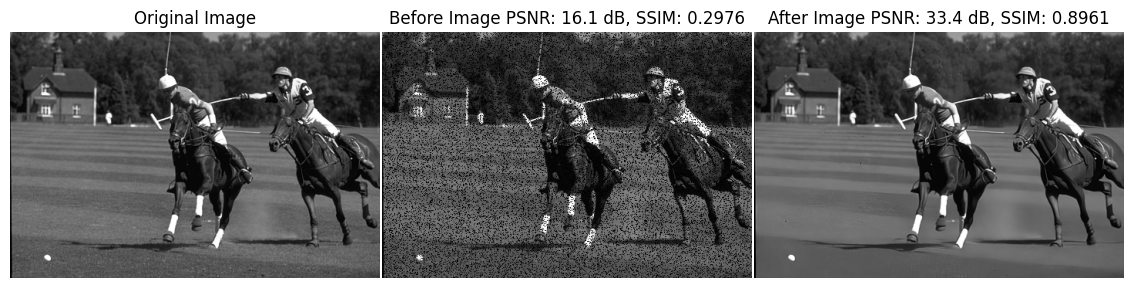

In [7]:
plot_before_after_and_original(arr, arr_bernoulli, model.predict(arr_bernoulli))

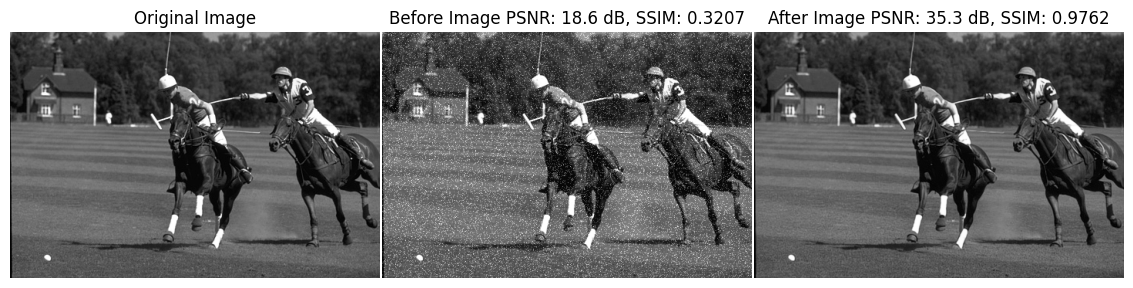

In [8]:
plot_before_after_and_original(arr, arr_poisson, model.predict(arr_poisson))

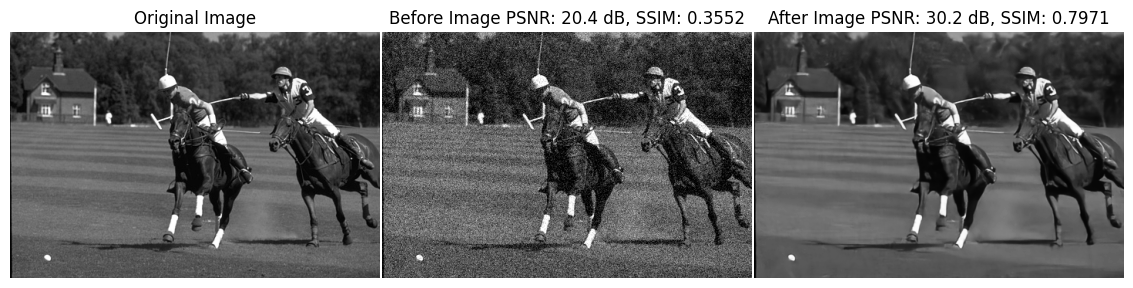

In [11]:
plot_before_after_and_original(arr, arr_gaussian, model.predict(arr_gaussian))